In [9]:
# 1. SET GLOBAL PATH 
import sys
path2oti = '../../../build'
sys.path.append(path2oti) # Add path to OTI library.

import pyoti.dense as oti
eps = oti.e

from pyoti.core import imdir

import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt

from ode_solve import *

In [2]:
from scipy.special import comb

In [14]:
oti.e(3)[[0,0]]

0.0

In [3]:
order = 20
var = 5

comb(order+var,order, exact = True)

53130

In [4]:
# Define functions



def F_eval( t, X ):
    x = X[0]
    y = X[1]
    return [1 -  (x**2-y**2) / (x**2+y**2)**2,  -2*x*y/(x**2+y**2)**2]


# def F_eval( t, X ):
#     x = X[0]
#     y = X[1]
#     return [y, x**3-x]

# def F_eval( t, X ):
#     x = X[0]
#     y = X[1]
#     return [y, -x**2]

def F_eval( t, X ):
    x = X[0]
    y = X[1]
    return [y, -x]

# def F_eval( t, X ):
#     x = X[0]
#     y = X[1]
#     return [y, -oti.sin(x)]

# # Stiff ode: system that describes the chemical reaction of Robertson
# def F_eval( t, X ):
#     x = X[0]
#     y = X[1]
#     z = X[2]
    
#     res = [
#         -0.04*x + 10**4 *y *z,
#         0.04*x - 10**4*y*z - 3*10**7 * y**2,
#         3*10**7 * y**2,
#     ]
#     return res

In [5]:
# Define initial value (starting point of the streamline).

x0 = [ -1.0, 2.0]
# zero = 0*oti.e(1)
# x0 = [ 1.3+zero, 0.0+zero]
# x0 = [ 1.0+zero, 1.0+zero,1.0+zero]

# x0 = [ 0, -2.0]

t0 = 0.0

In [6]:
F_eval(0,x0)

[2.0, 1.0]

In [7]:
# %timeit F_eval(t0,x0)

In [8]:
order = 10
epsilon = 1e-4
x, dt_est = ode_step(F_eval, x0, t0, eps = epsilon , order = order )

print("\nx0 :",x[0])
print("\nx1 :",x[1])

print("dt estimate: ",dt_est)

xf = np.array(X(dt_est,x))


x0 : -1 + 2 * e([1]) + 0.5 * e([[1,2]]) - 0.333333 * e([[1,3]]) - 0.0416667 * e([[1,4]]) + 0.0166667 * e([[1,5]]) + 0.00138889 * e([[1,6]]) - 0.000396825 * e([[1,7]]) - 2.48016e-05 * e([[1,8]]) + 5.51146e-06 * e([[1,9]]) + 2.75573e-07 * e([[1,10]])

x1 : 2 + 1 * e([1]) - 1 * e([[1,2]]) - 0.166667 * e([[1,3]]) + 0.0833333 * e([[1,4]]) + 0.00833333 * e([[1,5]]) - 0.00277778 * e([[1,6]]) - 0.000198413 * e([[1,7]]) + 4.96032e-05 * e([[1,8]]) + 2.75573e-06 * e([[1,9]]) - 5.51146e-07 * e([[1,10]])
dt estimate:  1.975178859752861


In [30]:
# %timeit F_eval(t0,x)

In [31]:
xf

array([2.23223665, 0.13247239])

In [32]:
%timeit sol = ode_integrate( F_eval, x0, 0., 40., eps=1e-6, order = 3, niter_max=1000000)

32.3 ms ± 133 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [33]:
sol = ode_integrate( F_eval, x0, 0., 40., eps=1e-6, order = 10, niter_max=1000000)

In [34]:
x0

[-1.0, 2.0]

In [35]:
sol[0]

[[-1.0, 2.0], [-1.0, 2.0], 0.0]

In [36]:
solArr = np.array(sol,dtype= object)

import pandas as pd

data = pd.DataFrame(data = solArr, columns=['xf','x_oti','t'])

In [37]:
data

,xf,x_oti,t
0,"[-1.0, 2.0]","[-1.0, 2.0]",0.0
1,"[1.6589226613218868, 1.499326427939498]","[-1 + 2 * e([1]) + 0.5 * e([[1,2]]) - 0.333333...",1.299536
2,"[1.8890043971095458, -1.196524406450888]",[1.65892 + 1.49933 * e([1]) - 0.829461 * e([[1...,2.599072
3,"[-0.6466212591646441, -2.1405357620223393]","[1.889 - 1.19652 * e([1]) - 0.944502 * e([[1,2...",3.898607
4,"[-2.2355252930950877, 0.049428726489411906]",[-0.646621 - 2.14054 * e([1]) + 0.323311 * e([...,5.198143
5,"[-0.5513792375050336, 2.167025981683252]",[-2.23553 + 0.0494287 * e([1]) + 1.11776 * e([...,6.497678
6,"[1.9400471142240656, 1.1118641990846077]",[-0.551379 + 2.16703 * e([1]) + 0.27569 * e([[...,7.797214
7,"[1.5910365620035818, -1.5711879565341407]",[1.94005 + 1.11186 * e([1]) - 0.970024 * e([[1...,9.09675
8,"[-1.087423835331142, -1.9538532372008848]",[1.59104 - 1.57119 * e([1]) - 0.795518 * e([[1...,10.396285
9,"[-2.1737804378708794, 0.5241333912991553]",[-1.08742 - 1.95385 * e([1]) + 0.543712 * e([[...,11.69582


In [38]:
tf =5.0
order = 10 
epsilon = 1e-6
sols = [] 

for i in range(1,order + 1):
    sols.append( ode_integrate( F_eval, x0, t0, tf, eps=epsilon, order = i,niter_max=100000) )
# end for 


In [39]:
solArray = np.array(sols[9],dtype = object)


In [40]:
def stats_ode_sol(ode_sols):

    for sol in ode_sols:
        
        solArr = np.array(sol, dtype= object)
        
        ti = solArr[:-1,2]
        tf = solArr[1:,2]
        dt = tf-ti
        sol_order = sol[1][1][0].order
        print("")
        print("Evaluated order : ", sol_order)
        print("Number of integration steps:", len(sol)-1)
        print("Number of calls to F:", (len(sol)-1)*sol_order)
        
        print("Max dt: ",np.max(dt))
        print("Min dt: ",np.min(dt))
        

    # end for 
# end 
        
        

In [41]:
stats_ode_sol(sols)


Evaluated order :  1
Number of integration steps: 5290
Number of calls to F: 5290
Max dt:  0.0009457416090031757
Min dt:  0.0009446251022060537

Evaluated order :  2
Number of integration steps: 360
Number of calls to F: 720
Max dt:  0.0138959662104197
Min dt:  0.013895958459979596

Evaluated order :  3
Number of integration steps: 88
Number of calls to F: 264
Max dt:  0.05723817520643326
Min dt:  0.057237619056446434

Evaluated order :  4
Number of integration steps: 36
Number of calls to F: 144
Max dt:  0.13993920648045766
Min dt:  0.13993915551845929

Evaluated order :  5
Number of integration steps: 20
Number of calls to F: 100
Max dt:  0.2618029780297592
Min dt:  0.2618026167583807

Evaluated order :  6
Number of integration steps: 12
Number of calls to F: 72
Max dt:  0.41864832894427456
Min dt:  0.4186482236699769

Evaluated order :  7
Number of integration steps: 9
Number of calls to F: 63
Max dt:  0.6053472957333064
Min dt:  0.6053470636957325

Evaluated order :  8
Number of i

In [42]:
dt = 1e-2
x_vals_oti = []
for i in range(1,order + 1):
    
    x_vals_oti.append( get_interpolate(sols[i-1], dt, tf) )
    
# end for 

A = np.zeros((10,3))
A[:,0] = np.arange(0,10,1)

In [43]:
x_vals_oti

[array([[-1.        ,  2.        ,  0.        ],
        [-0.97995487,  2.00990912,  0.01      ],
        [-0.95981171,  2.01961766,  0.02      ],
        ...,
        [-2.19840606, -0.43657837,  4.98      ],
        [-2.20267217, -0.4145748 ,  4.99      ],
        [-2.20671836, -0.39252961,  5.        ]]),
 array([[-1.        ,  2.        ,  0.        ],
        [-0.97995   ,  2.0099    ,  0.01      ],
        [-0.9598017 ,  2.01959916,  0.02      ],
        ...,
        [-2.19331234, -0.43519841,  4.98      ],
        [-2.19755477, -0.41324296,  4.99      ],
        [-2.20157736, -0.39124659,  5.        ]]),
 array([[-1.        ,  2.        ,  0.        ],
        [-0.97995033,  2.00989983,  0.01      ],
        [-0.95980267,  2.01959867,  0.02      ],
        ...,
        [-2.19315451, -0.43552803,  4.98      ],
        [-2.19740006, -0.41357508,  4.99      ],
        [-2.20142585, -0.39158076,  5.        ]]),
 array([[-1.        ,  2.        ,  0.        ],
        [-0.97995033,  2

<IPython.core.display.Javascript object>


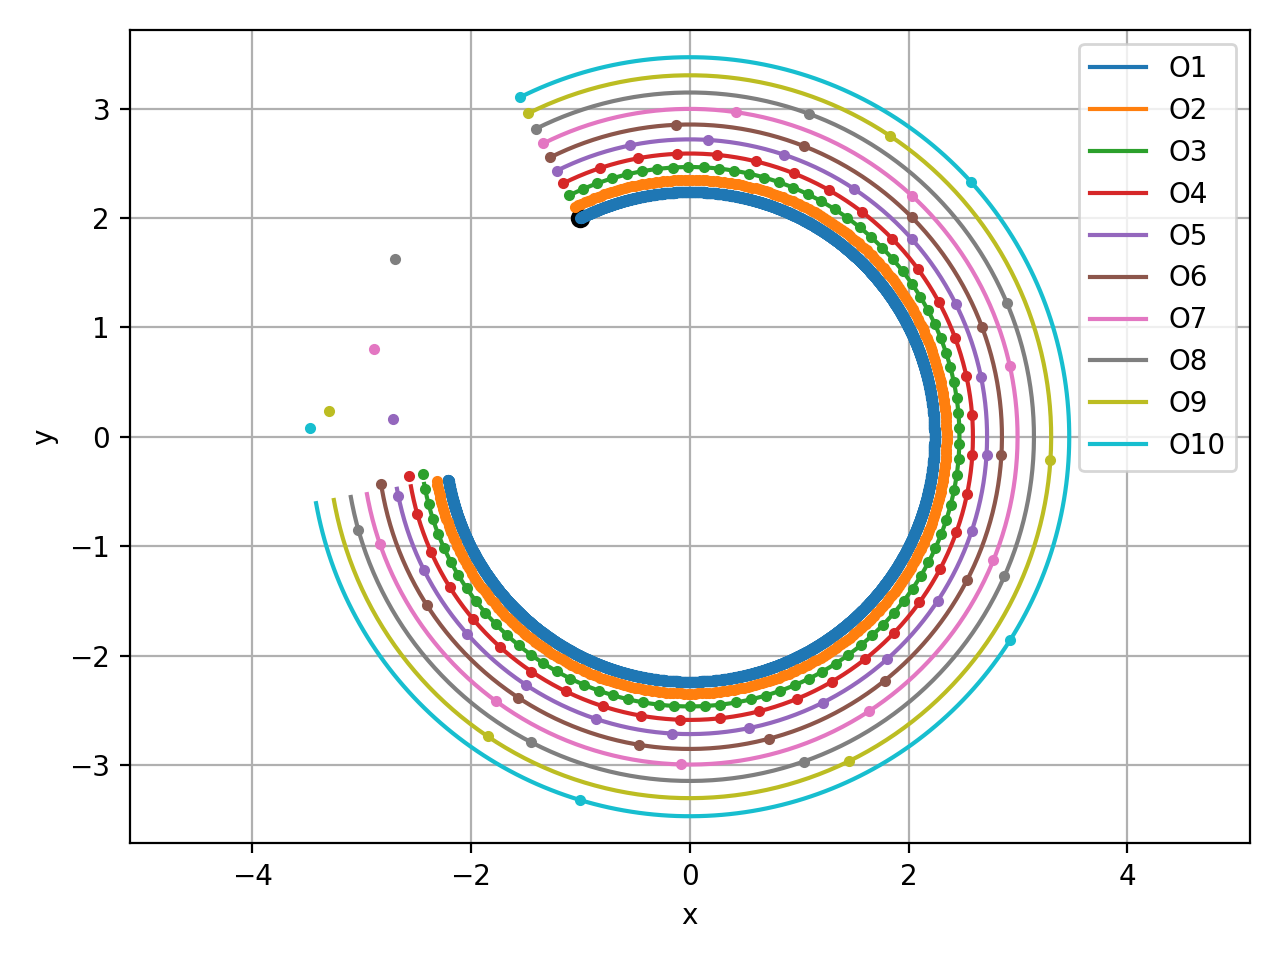

<ipython-input-44-b9813eeb29f7>:25: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


In [44]:
plt.figure()

plt.plot(x0[0],x0[1],'ko')
symbols = [".","o","|","s",">","<","x"]
delt = 1.05
fact_mult = 1.0
for i in range(1,order +1,1):
# for i in range(1,4):
    sol = sols[i-1]
    x_vals = x_vals_oti[i-1]
    color = 'C%d'%(int(i-1))
#     print(color)
    plt.plot(fact_mult*x_vals[:,0],fact_mult*x_vals[:,1],color,linewidth=1.5, label="O%d"%(i))
    for j in range(len(sol)):
#         plt.plot(fact_mult*sol[j][0][0],fact_mult*sol[j][0][1],color+symbols[i%len(symbols)])
        plt.plot(fact_mult*sol[j][0][0],fact_mult*sol[j][0][1],color+'.')
    # end for 1
    fact_mult *= delt
# end for
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid('on')
plt.axis('equal')
plt.tight_layout()
plt.savefig("streamline_oti.pdf",dpi=300)
plt.show()


In [20]:
x_vals

array([[-1.        ,  2.        ,  0.        ],
       [-0.97995033,  2.00989983,  0.01      ],
       [-0.95980267,  2.01959868,  0.02      ],
       ...,
       [-2.19324203, -0.43554827,  4.98      ],
       [-2.19748779, -0.41359444,  4.99      ],
       [-2.20151381, -0.39159924,  5.        ]])

In [45]:
dt_euler = 1e-6
x_vals_euler = euler_integration(F_eval, x0, dt_euler, tf)
slicer = int(np.ceil(dt / dt_euler))
x_vals_euler = x_vals_euler[::slicer]
x_vals_euler

array([[-1.        ,  2.        ,  0.        ],
       [-0.97995034,  2.00989984,  0.01      ],
       [-0.95980268,  2.0195987 ,  0.02      ],
       ...,
       [-2.19324443, -0.43554995,  4.98      ],
       [-2.19749021, -0.4135961 ,  4.99      ],
       [-2.20151624, -0.39160088,  5.        ]])

<IPython.core.display.Javascript object>


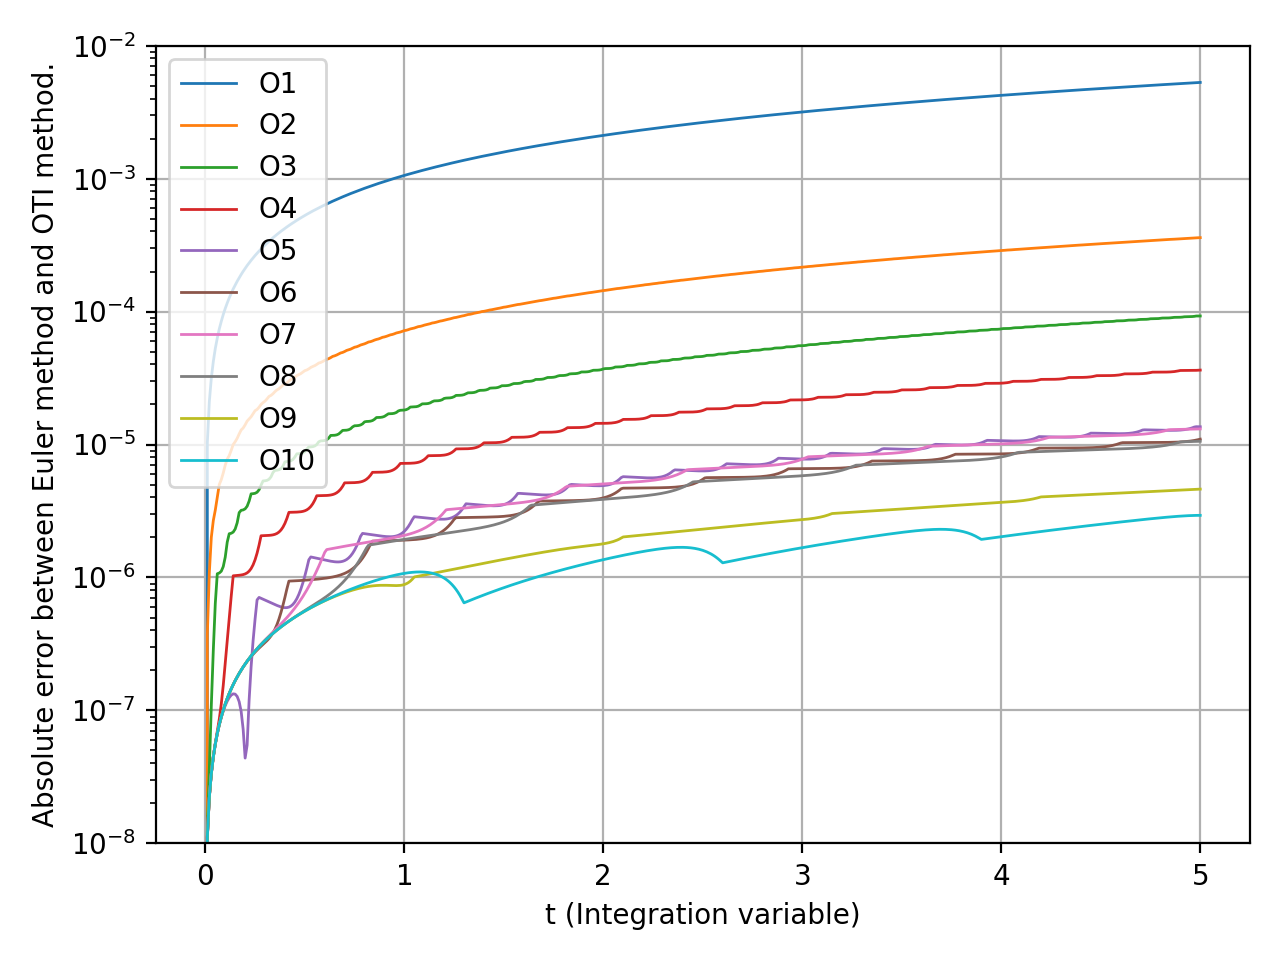

In [49]:
# Plot error values1e-6
plt.figure()

symbols = [".","o","|","s",">","<","x"]
for i in range(1,order +1,1):
# for i in [5,6,10]:

    sol = sols[i-1]
    x_vals = x_vals_oti[i-1]
    # Subtract to euler integration to obtain the error measures.
    err = np.linalg.norm(x_vals[:,:2] - x_vals_euler[:,:2],axis=1)

    color = 'C%d'%(int(i-1))

    plt.semilogy(x_vals[:,2],err,color,linewidth=1.0, label="O%d"%(i))
#     for j in range(len(sol)):
#         plt.semilogy([sol[j][2],sol[j][2]],[1e-9,1e-5],'k',linewidth=1.0)
        

# end for

plt.xlabel("t (Integration variable)")
plt.ylabel("Absolute error between Euler method and OTI method.")
plt.legend()
plt.axis([None,None,1e-8,1e-2])
plt.grid('on')
plt.tight_layout()
plt.savefig("streamline_oti_error.pdf",dpi=300)
plt.show()


In [20]:
dt = 1e-5
x_vals_oti = []

for i in range(1,order+1):
    
    x_vals_oti.append( get_x(dt, dt_est, x, order = i ) )

# end for 


In [54]:
print("Error between Euler method with dt = ",dt," and OTI ODE solution.")
print("eps requested: ", epsilon)
print("eps obtained:  ", np.linalg.norm(xf-x_vals_euler[-1]))
np.linalg.norm(xf-x_vals_euler[-1])

Error between Euler method with dt =  1e-05  and OTI ODE solution.
eps requested:  0.0001
eps obtained:   0.00010221031273765867


0.00010221031273765867

<IPython.core.display.Javascript object>


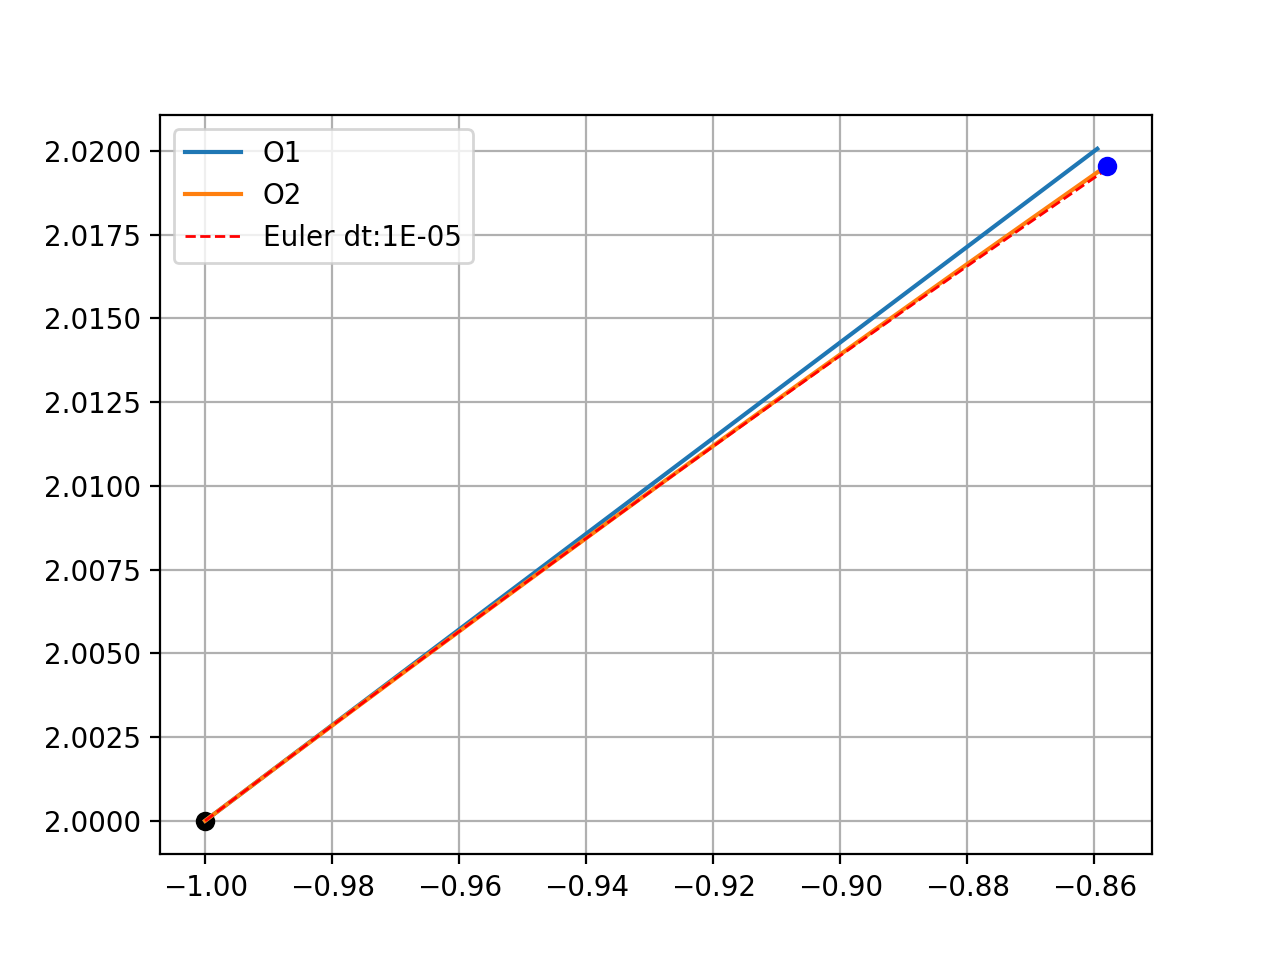

In [56]:
plt.figure()

plt.plot(x0[0],x0[1],'ko')
# plt.plot(x_vals_euler[:,0],x_vals_euler[:,1],'--r',linewidth=2.5, label="Euler dt:%.0E"%dt)

for i in range(1,order+1):
    label = "O%d"%(i)
#     print(label)
    plt.plot(x_vals_oti[i-1][:,0],x_vals_oti[i-1][:,1],'C%d'%(int(i-1)),label=label)
# end for

plt.plot(x_vals_euler[:,0],x_vals_euler[:,1],'--r',linewidth=1.0, label="Euler dt:%.0E"%dt)

plt.plot(xf[0],xf[1],'bo')
plt.legend()
plt.grid('on')
plt.show()

<IPython.core.display.Javascript object>


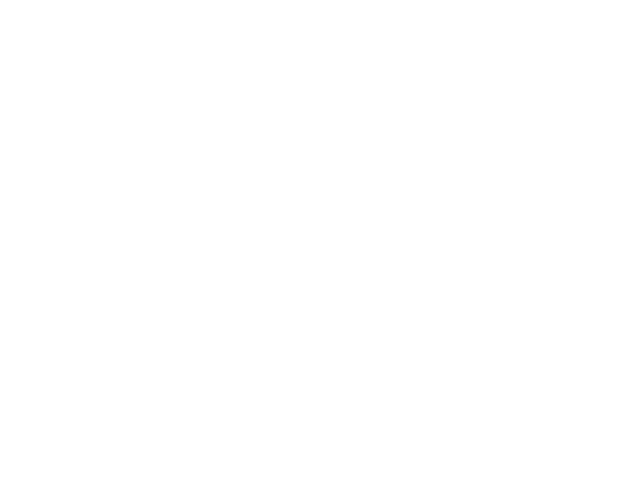

ValueError: operands could not be broadcast together with shapes (10661,) (10662,) 

In [11]:
plt.figure()

error = np.sqrt((x_vals_euler[:,0] - x_vals_oti[:,0])**2 + (x_vals_euler[:,1]-x_vals_oti[:,1])**2)
plt.plot(error,'r',linewidth=2.5)

plt.show()

In [40]:
# Analytical derivatives:

import sympy as sym

xs,ys = sym.symbols('x,y')

In [41]:
f1s,f2s = F_eval([xs,ys])

In [42]:
f1s

-(x**2 - y**2)/(x**2 + y**2)**2 + 1

In [43]:
f2s

-2*x*y/(x**2 + y**2)**2

In [37]:
i=2
"O{0}".format(i)

'O2'